In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.2, 3, '-ln(1-x)')

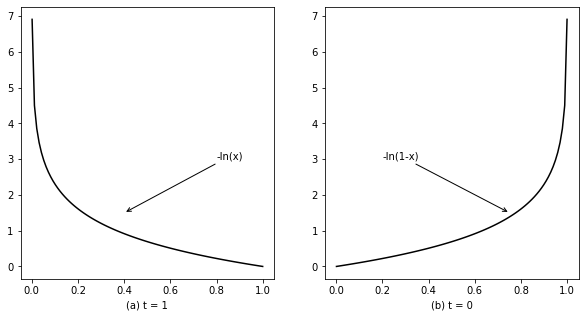

In [19]:
_,ax = plt.subplots(ncols=2,figsize = (10,5))
ax = ax.flatten()
x = np.linspace(0.001,0.999,100)
y = -np.log(x)
y2 = -np.log(1-x)
ax[0].plot(x,y,c="black")
ax[0].set_xlabel("(a) t = 1")
ax[0].annotate(xy = (0.4,1.5),xytext = (0.8,3), text = "-ln(x)",arrowprops={"arrowstyle":"->"})

ax[1].plot(x,y2,c="black")
ax[1].set_xlabel("(b) t = 0")
ax[1].annotate(xy = (0.75,1.5),xytext = (0.2,3), text = "-ln(1-x)",arrowprops={"arrowstyle":"->"})


In [45]:
y.shape

(3000,)

Text(1, -14, 'Coef. Spearman = 1.0')

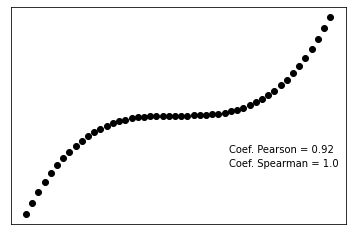

In [90]:
from scipy.stats import pearsonr,spearmanr
point = 50
maxi = 3
x = np.linspace(-maxi,maxi,point) 
y = x**3
# x = np.concatenate((x,[0,0]))
# y = np.concatenate((y,[100,-100]))
plt.scatter(x,y,color = "black")
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.text(s = "Coef. Pearson = %s" %round(pearsonr(y,x)[0],2),x = 1,y=-10)
plt.text(s = "Coef. Spearman = %s" %round(spearmanr(y,x)[0],2),x = 1,y=-14)

In [70]:
pearsonr(y,x)[0]

0.9165762522220613

In [71]:
spearmanr(x,y)

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

(-1.0, 25.0)

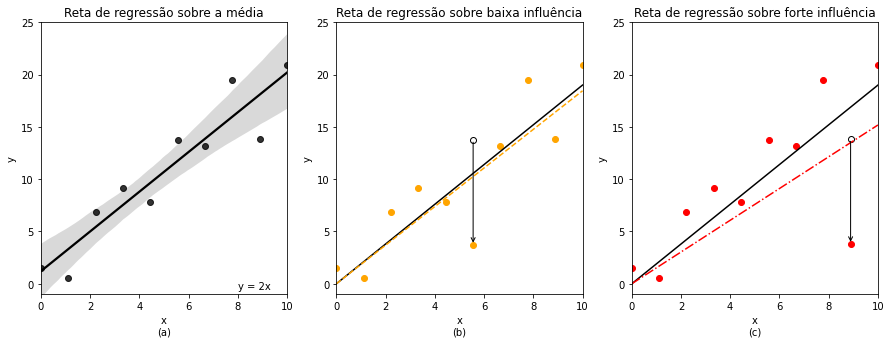

In [157]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

lr0 = LinearRegression();lr1 = LinearRegression();lr2 = LinearRegression()

qtd_pontos = 10
x = np.linspace(0,10,qtd_pontos) 
y = 2*x + 2*np.random.randn(qtd_pontos)
lr0.fit(x.reshape(-1,1),y.reshape(-1,1))

_,ax = plt.subplots(nrows=1,ncols = 3,figsize = (15,5))
ax = ax.flatten()
sns.regplot(x = x, y =y,color='black',ax = ax[0])
ax[0].set_title("Reta de regressão sobre a média")

ax[0].text(x = 8,y=-0.5,s = "y = 2x")


y2 = y.copy()
y2[5] = y2[5] - 10
lr1.fit(x.reshape(-1,1),y2.reshape(-1,1))

ax[1].scatter(x,y2,color = "orange")
ax[1].scatter(x[5],y[5],color = "white",edgecolors = 'black')
ax[1].plot(x,lr0.coef_[0]*x,color =  "black")
ax[1].plot(x,lr1.coef_[0]*x,color =  "orange",linestyle = "--")
ax[1].set_title("Reta de regressão sobre baixa influência")
ax[1].annotate(xy = (x[5],y2[5]), xytext = (x[5],y[5]), text = "",arrowprops = {"arrowstyle":"->"})


y3 = y.copy()
y3[8] = y3[8] - 10
lr2.fit(x.reshape(-1,1),y3.reshape(-1,1)) 

ax[2].scatter(x,y3,color = "red")
ax[2].plot(x,lr0.coef_[0]*x,color =  "black")
ax[2].plot(x,lr2.coef_[0]*x,color =  "red",linestyle = "-.")
ax[2].scatter(x[8],y[8],color = "white",edgecolors = 'black')
ax[2].annotate(xy = (x[8],y3[8]), xytext = (x[8],y[8]), text = "",arrowprops = {"arrowstyle":"->"})
ax[2].set_title("Reta de regressão sobre forte influência")

ax[0].set_xlabel("x\n(a)")
ax[0].set_ylabel("y")
ax[1].set_xlabel("x\n(b)")
ax[1].set_ylabel("y")
ax[2].set_xlabel("x\n(c)")
ax[2].set_ylabel("y")

ax[0].set_xlim([0,10]);ax[0].set_ylim([-1,25])
ax[1].set_xlim([0,10]);ax[1].set_ylim([-1,25])
ax[2].set_xlim([0,10]);ax[2].set_ylim([-1,25])

Text(0, 0.5, 'y')

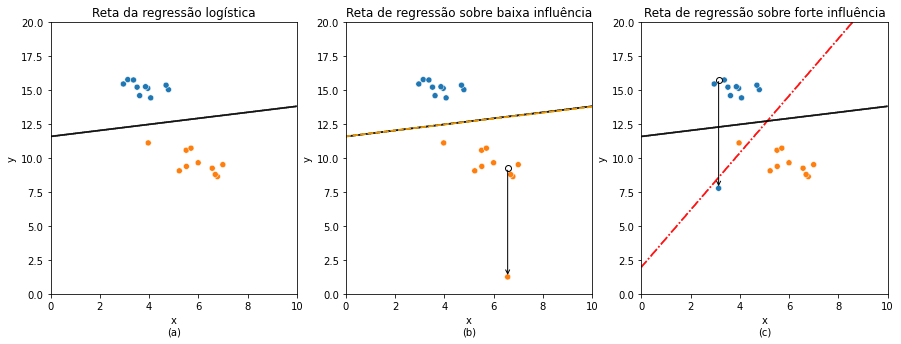

In [165]:
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def linha_decisao(model,ax,xmin,xmax,ymin,ymax,color="black",linestyles ="solid"):
    xx,yy = np.meshgrid(np.linspace(xmin,xmax,1000),np.linspace(ymin,ymax,1000))
    grid = np.c_[xx.ravel(),yy.ravel()]
    z = model.predict(grid)
    z = z.reshape(xx.shape)
    return ax.contour(xx,yy,z,alpha = 0.3,colors = color,linestyles=linestyles)

xmin=0;xmax= 10; ymin = 0;ymax = 20;

blob,color_blob = make_blobs(n_samples=20,cluster_std = [0.5,0.7],centers = [(4,15),(6,10)],random_state=30)
x = blob[:,0]; y = blob[:,1];

lr = LogisticRegression();lr1 = LogisticRegression();lr2 = LogisticRegression()
lr.fit(np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis = 1),color_blob)

_,ax = plt.subplots(nrows=1,ncols = 3,figsize = (15,5))
ax = ax.flatten()
sns.scatterplot(x = x, y =y,hue = color_blob,ax = ax[0])
linha_decisao(model = lr,ax = ax[0],xmin =xmin,xmax = xmax,ymin = ymin,ymax = ymax)
ax[0].set_title("Reta da regressão logística")


#ax[0].text(x = 8,y=-0.5,s = "y = 2x")



y2 = y.copy()
y2[5] = y2[5] - 8
lr1.fit(np.concatenate((x.reshape(-1,1),y2.reshape(-1,1)),axis = 1),color_blob)

sns.scatterplot(x = x, y =y2,hue = color_blob,ax = ax[1])
linha_decisao(model = lr,ax = ax[1],xmin =xmin,xmax = xmax,ymin = ymin,ymax = ymax)
linha_decisao(model = lr1,ax = ax[1],xmin =xmin,xmax = xmax,ymin = ymin,ymax = ymax,color = "orange",linestyles="dashed")
ax[1].annotate(xy = (x[5],y2[5]), xytext = (x[5],y[5]), text = "",arrowprops = {"arrowstyle":"->"})
ax[1].scatter(x[5],y[5],color = "white",edgecolors = 'black')
ax[1].set_title("Reta de regressão sobre baixa influência")


y3 = y.copy()
y3[9] = y3[9] - 8
lr2.fit(np.concatenate((x.reshape(-1,1),y3.reshape(-1,1)),axis = 1),color_blob)

sns.scatterplot(x = x, y =y3,hue = color_blob,ax = ax[2])
linha_decisao(model = lr2,ax = ax[2],xmin =xmin,xmax = xmax,ymin = ymin,ymax = ymax,color = "red",linestyles="dashdot")
linha_decisao(model = lr,ax = ax[2],xmin =xmin,xmax = xmax,ymin = ymin,ymax = ymax)
ax[2].scatter(x[9],y[9],color = "white",edgecolors = 'black')
ax[2].annotate(xy = (x[9],y3[9]), xytext = (x[9],y[9]), text = "",arrowprops = {"arrowstyle":"->"})
ax[2].set_title("Reta de regressão sobre forte influência")




ax[0].set_xlim((xmin,xmax));ax[1].set_xlim((xmin,xmax));ax[2].set_xlim((xmin,xmax))
ax[0].set_ylim((ymin,ymax));ax[1].set_ylim((ymin,ymax));ax[2].set_ylim((ymin,ymax))
ax[0].get_legend().remove();ax[1].get_legend().remove();ax[2].get_legend().remove()

ax[0].set_xlabel("x\n(a)")
ax[0].set_ylabel("y")
ax[1].set_xlabel("x\n(b)")
ax[1].set_ylabel("y")
ax[2].set_xlabel("x\n(c)")
ax[2].set_ylabel("y")

<AxesSubplot:>

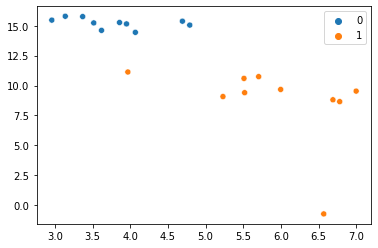

In [139]:
sns.scatterplot(x = x, y =y2,hue = color_blob)

<AxesSubplot:>

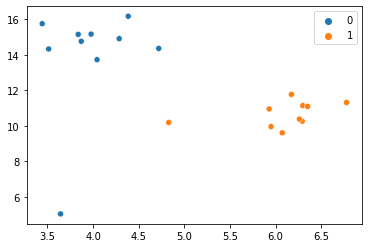

<AxesSubplot:>

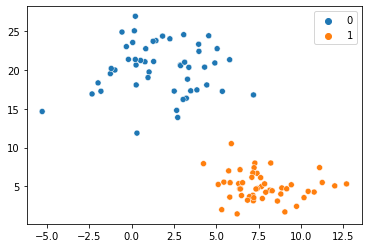

In [86]:
blob,color_blob = make_blobs(cluster_std = [3,2],centers = [(2,20),(8,5)])
sns.scatterplot(x = blob[:,0], y = blob[:,1], hue = color_blob)

In [18]:
lr = LogisticRegression()
lr.fit(blob,color)

LogisticRegression()

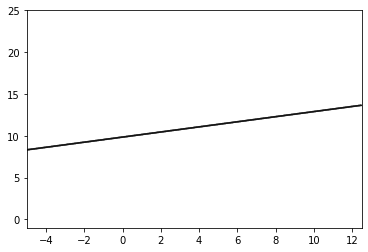

In [67]:
linha_decisao(lr)

In [30]:
np.linspace(-5,12.5,100)*lr.coef_[0][1]

array([  5.22786447,   5.04304097,   4.85821748,   4.67339399,
         4.4885705 ,   4.30374701,   4.11892352,   3.93410003,
         3.74927654,   3.56445304,   3.37962955,   3.19480606,
         3.00998257,   2.82515908,   2.64033559,   2.4555121 ,
         2.27068861,   2.08586511,   1.90104162,   1.71621813,
         1.53139464,   1.34657115,   1.16174766,   0.97692417,
         0.79210068,   0.60727719,   0.42245369,   0.2376302 ,
         0.05280671,  -0.13201678,  -0.31684027,  -0.50166376,
        -0.68648725,  -0.87131074,  -1.05613424,  -1.24095773,
        -1.42578122,  -1.61060471,  -1.7954282 ,  -1.98025169,
        -2.16507518,  -2.34989867,  -2.53472216,  -2.71954566,
        -2.90436915,  -3.08919264,  -3.27401613,  -3.45883962,
        -3.64366311,  -3.8284866 ,  -4.01331009,  -4.19813359,
        -4.38295708,  -4.56778057,  -4.75260406,  -4.93742755,
        -5.12225104,  -5.30707453,  -5.49189802,  -5.67672152,
        -5.86154501,  -6.0463685 ,  -6.23119199,  -6.41

In [40]:
lr.

array([[ 0.31878514, -1.04557289]])

<AxesSubplot:>

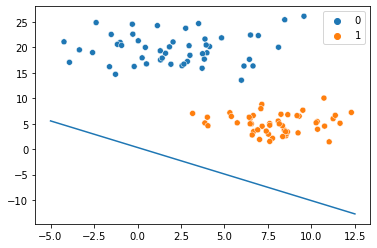

In [31]:
sns.scatterplot(x = blob[:,0], y = blob[:,1], hue = color)
sns.lineplot(x = np.linspace(-5,12.5,100),y = np.linspace(-5,12.5,100)*lr.coef_[0][1] + lr.coef_[0][0])

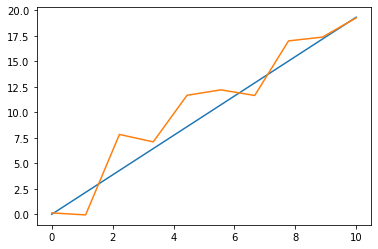

In [114]:
plt.plot(x,lr0.coef_[0][0]*x)
plt.plot(x,y)